<a href="https://colab.research.google.com/github/Abhishek-jakhar/Machine_learning/blob/main/Polynomial_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [3]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

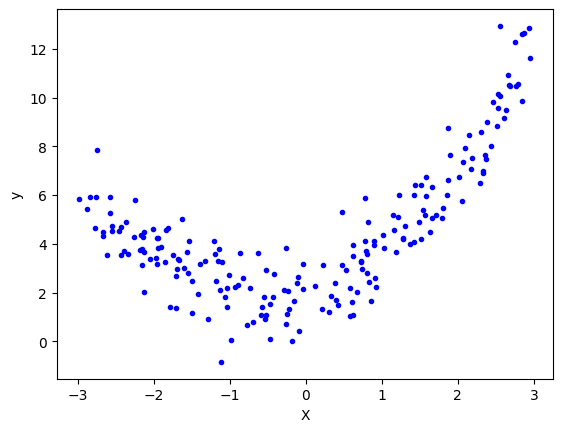

In [4]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
#applying LR
lr = LinearRegression()



In [7]:
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.260926358439582

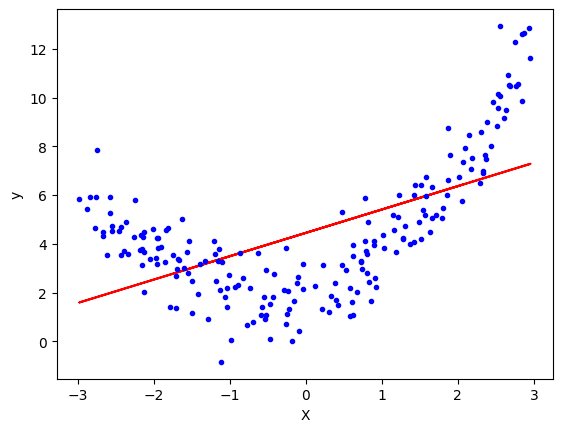

In [9]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [10]:
# applying polynomial LR
# Degree 2

In [30]:
poly = PolynomialFeatures(degree=2)
# if i will do include_bias = False then i will only get X^1 and X^2

In [22]:
poly = PolynomialFeatures(degree = 2, include_bias=False)

In [31]:
X_train_tras = poly.fit_transform(X_train)
X_test_tras = poly.transform(X_test)
# this update will not apply on y column


In [32]:
X_train_tras.shape

(160, 3)

In [33]:
X_test_tras.shape

(40, 3)

In [34]:
print(X_train[0])
print(X_train_tras[0])
# x^0  X^1   X^2

[-1.56461442]
[ 1.         -1.56461442  2.44801827]


In [36]:
lr = LinearRegression()
lr.fit(X_train_tras,y_train )

LinearRegression()

In [39]:
y_pred = lr.predict(X_test_tras)

In [40]:
r2_score(y_test,y_pred)

0.849082535456217

In [41]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.8753216  0.79158198]]
[2.10129799]


In [42]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

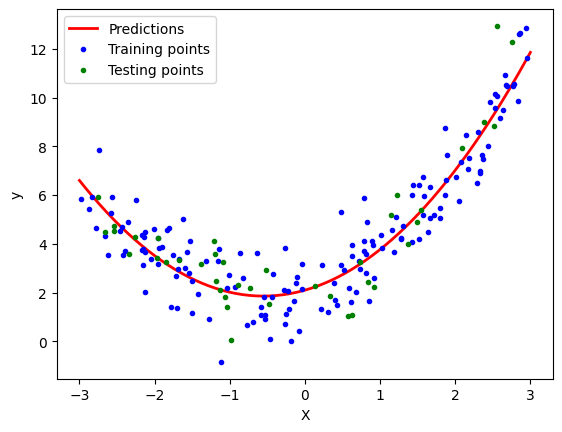

In [43]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [44]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

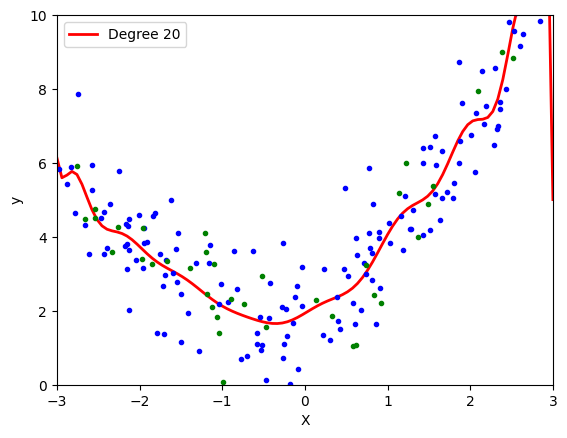

In [50]:
polyn = polynomial_regression(20)